## Import all package dependencies

In [51]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet152V2
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.utils import validation
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pathlib
from google.colab import drive
from google.colab import files
import os, zipfile, shutil
import PIL
from PIL import Image
import numpy as np
from skimage import transform
%matplotlib inline

## Proccess the datasets file from zip until train/validation split

In [3]:
# Mount google drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Get path and extract dataset
zip_loc = '/content/gdrive/MyDrive/Datasets/garbage_classification.zip'
zip_ref = zipfile.ZipFile(zip_loc, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [5]:
# Create new train and val directory also split the dataset
base_dir = '/content/garbage_classification'

# Initiate train and validation path in base directory
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

# Initiate label directory
battery_dir = os.path.join(base_dir, 'battery')
biological_dir = os.path.join(base_dir, 'biological')
brown_glass_dir = os.path.join(base_dir, 'brown-glass')
cardboard_dir = os.path.join(base_dir, 'cardboard')
clothes_dir = os.path.join(base_dir, 'clothes')
green_glass_dir = os.path.join(base_dir, 'green-glass')
metal_dir = os.path.join(base_dir, 'metal')
paper_dir = os.path.join(base_dir, 'paper')
plastic_dir = os.path.join(base_dir, 'plastic')
shoes_dir = os.path.join(base_dir, 'shoes')
trash_dir = os.path.join(base_dir, 'trash')
white_glass_dir = os.path.join(base_dir, 'white-glass')

In [6]:
# Create directory for train and val
os.mkdir(train_dir)
os.mkdir(val_dir)

In [7]:
# Initiate each label directory inside train directory
train_battery = os.path.join(train_dir, 'battery')
train_biological = os.path.join(train_dir, 'biological')
train_brown_glass = os.path.join(train_dir, 'brown-glass')
train_cardboard = os.path.join(train_dir, 'cardboard')
train_clothes = os.path.join(train_dir, 'clothes')
train_green_glass = os.path.join(train_dir, 'green-glass')
train_metal = os.path.join(train_dir, 'metal')
train_paper = os.path.join(train_dir, 'paper')
train_plastic = os.path.join(train_dir, 'plastic')
train_shoes = os.path.join(train_dir, 'shoes')
train_trash = os.path.join(train_dir, 'trash')
train_white_glass = os.path.join(train_dir, 'white-glass')

# Initiate each label directory inside val directory
val_battery = os.path.join(val_dir, 'battery')
val_biological = os.path.join(val_dir, 'biological')
val_brown_glass = os.path.join(val_dir, 'brown-glass')
val_cardboard = os.path.join(val_dir, 'cardboard')
val_clothes = os.path.join(val_dir, 'clothes')
val_green_glass = os.path.join(val_dir, 'green-glass')
val_metal = os.path.join(val_dir, 'metal')
val_paper = os.path.join(val_dir, 'paper')
val_plastic = os.path.join(val_dir, 'plastic')
val_shoes = os.path.join(val_dir, 'shoes')
val_trash = os.path.join(val_dir, 'trash')
val_white_glass = os.path.join(val_dir, 'white-glass')

In [8]:
# Create directory inside train and val

# Train
os.mkdir(train_battery)
os.mkdir(train_biological)
os.mkdir(train_brown_glass)
os.mkdir(train_cardboard)
os.mkdir(train_clothes)
os.mkdir(train_green_glass)
os.mkdir(train_metal)
os.mkdir(train_paper)
os.mkdir(train_plastic)
os.mkdir(train_shoes)
os.mkdir(train_trash)
os.mkdir(train_white_glass)

# Val
os.mkdir(val_battery)
os.mkdir(val_biological)
os.mkdir(val_brown_glass)
os.mkdir(val_cardboard)
os.mkdir(val_clothes)
os.mkdir(val_green_glass)
os.mkdir(val_metal)
os.mkdir(val_paper)
os.mkdir(val_plastic)
os.mkdir(val_shoes)
os.mkdir(val_trash)
os.mkdir(val_white_glass)


In [9]:
# Split data train and validation set by 80 : 20
train_battery_dir, val_battery_dir = train_test_split(os.listdir(battery_dir), train_size = 0.8)
train_biological_dir, val_biological_dir = train_test_split(os.listdir(biological_dir), train_size = 0.8)
train_brown_glass_dir, val_brown_glass_dir = train_test_split(os.listdir(brown_glass_dir), train_size = 0.8)
train_cardboard_dir, val_cardboard_dir = train_test_split(os.listdir(cardboard_dir), train_size = 0.8)
train_clothes_dir, val_clothes_dir = train_test_split(os.listdir(clothes_dir), train_size = 0.8)
train_green_glass_dir, val_green_glass_dir = train_test_split(os.listdir(green_glass_dir), train_size = 0.8)
train_metal_dir, val_metal_dir = train_test_split(os.listdir(metal_dir), train_size = 0.8)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), train_size = 0.8)
train_plastic_dir, val_plastic_dir = train_test_split(os.listdir(plastic_dir), train_size = 0.8)
train_shoes_dir, val_shoes_dir = train_test_split(os.listdir(shoes_dir), train_size = 0.8)
train_trash_dir, val_trash_dir = train_test_split(os.listdir(trash_dir), train_size = 0.8)
train_white_glass_dir, val_white_glass_dir = train_test_split(os.listdir(white_glass_dir), train_size = 0.8)

In [10]:
# Copy file from original dir to train and val dir

# Train
for file in train_battery_dir:
  shutil.copy(os.path.join(battery_dir, file), os.path.join(train_battery, file))
for file in train_biological_dir:
  shutil.copy(os.path.join(biological_dir, file), os.path.join(train_biological, file))
for file in train_brown_glass_dir:
  shutil.copy(os.path.join(brown_glass_dir, file), os.path.join(train_brown_glass, file))
for file in train_cardboard_dir:
  shutil.copy(os.path.join(cardboard_dir, file), os.path.join(train_cardboard, file))
for file in train_clothes_dir:
  shutil.copy(os.path.join(clothes_dir, file), os.path.join(train_clothes, file))
for file in train_green_glass_dir:
  shutil.copy(os.path.join(green_glass_dir, file), os.path.join(train_green_glass, file))
for file in train_metal_dir:
  shutil.copy(os.path.join(metal_dir, file), os.path.join(train_metal, file))
for file in train_paper_dir:
  shutil.copy(os.path.join(paper_dir, file), os.path.join(train_paper, file))
for file in train_plastic_dir:
  shutil.copy(os.path.join(plastic_dir, file), os.path.join(train_plastic, file))
for file in train_shoes_dir:
  shutil.copy(os.path.join(shoes_dir, file), os.path.join(train_shoes, file))
for file in train_trash_dir:
  shutil.copy(os.path.join(trash_dir, file), os.path.join(train_trash, file))
for file in train_white_glass_dir:
  shutil.copy(os.path.join(white_glass_dir, file), os.path.join(train_white_glass, file))

# Val
# Train
for file in val_battery_dir:
  shutil.copy(os.path.join(battery_dir, file), os.path.join(val_battery, file))
for file in val_biological_dir:
  shutil.copy(os.path.join(biological_dir, file), os.path.join(val_biological, file))
for file in val_brown_glass_dir:
  shutil.copy(os.path.join(brown_glass_dir, file), os.path.join(val_brown_glass, file))
for file in val_cardboard_dir:
  shutil.copy(os.path.join(cardboard_dir, file), os.path.join(val_cardboard, file))
for file in val_clothes_dir:
  shutil.copy(os.path.join(clothes_dir, file), os.path.join(val_clothes, file))
for file in val_green_glass_dir:
  shutil.copy(os.path.join(green_glass_dir, file), os.path.join(val_green_glass, file))
for file in val_metal_dir:
  shutil.copy(os.path.join(metal_dir, file), os.path.join(val_metal, file))
for file in val_paper_dir:
  shutil.copy(os.path.join(paper_dir, file), os.path.join(val_paper, file))
for file in val_plastic_dir:
  shutil.copy(os.path.join(plastic_dir, file), os.path.join(val_plastic, file))
for file in val_shoes_dir:
  shutil.copy(os.path.join(shoes_dir, file), os.path.join(val_shoes, file))
for file in val_trash_dir:
  shutil.copy(os.path.join(trash_dir, file), os.path.join(val_trash, file))
for file in val_white_glass_dir:
  shutil.copy(os.path.join(white_glass_dir, file), os.path.join(val_white_glass, file))

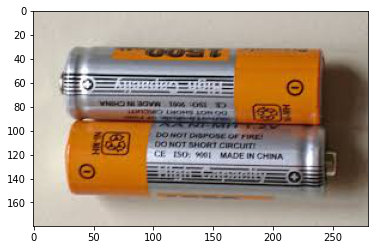

In [11]:
# See one of data train
img = image.load_img('/content/garbage_classification/train/battery/battery1.jpg')
img2 = image.load_img('/content/garbage_classification/train/battery/battery10.jpg')
imgplot = plt.imshow(img)
imgplot

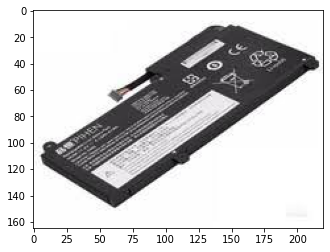

In [12]:
imgplot2 = plt.imshow(img2)

## Data Preprocessing

In [13]:
# Use image data gen to augment our dataset
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = training_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    class_mode='categorical',
    batch_size=256
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    class_mode='categorical',
    batch_size=64
)

Found 12409 images belonging to 12 classes.
Found 3106 images belonging to 12 classes.


# Create model and preparation for training

In [14]:
# Initate Sequential Model
model = tf.keras.models.Sequential([
                                    
    # Use pretrained models
    ResNet152V2(weights="imagenet", include_top=False, input_tensor=Input(shape=(150, 150, 3))),

    # Flatten the results 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    # Dense layers
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(12, activation='softmax')
])
model.layers[0].trainable = False
model.summary()

234561536/234545216 [==============================] - 5s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 5, 5, 2048)        58331648  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dropout (Dropout)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 512)               26214912  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                       

In [15]:
# Compile model
adam = tf.optimizers.Adam(learning_rate=0.01, decay=0.0001)
model.compile(optimizer=tf.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

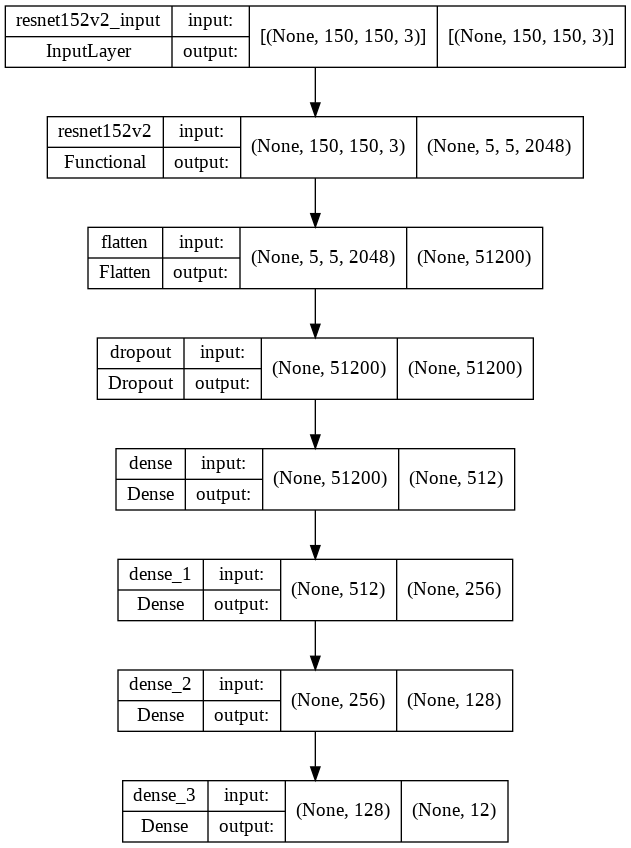

In [16]:
# Plot model
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

In [17]:
# Initiate callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.92 and logs.get('val_accuracy') > 0.92):
      print("\nAccuracy already reached >92%!")
      self.model.stop_training = True
callbacks = myCallback()

In [18]:
# Train model
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=50, 
                    verbose=2,
                    callbacks=[callbacks])

Epoch 1/50
49/49 - 187s - loss: 2.0308 - accuracy: 0.7130 - val_loss: 0.5716 - val_accuracy: 0.8335 - 187s/epoch - 4s/step
Epoch 2/50
49/49 - 154s - loss: 0.4681 - accuracy: 0.8587 - val_loss: 0.3962 - val_accuracy: 0.8825 - 154s/epoch - 3s/step
Epoch 3/50
49/49 - 153s - loss: 0.3708 - accuracy: 0.8889 - val_loss: 0.3715 - val_accuracy: 0.8870 - 153s/epoch - 3s/step
Epoch 4/50
49/49 - 153s - loss: 0.3096 - accuracy: 0.9048 - val_loss: 0.3609 - val_accuracy: 0.8934 - 153s/epoch - 3s/step
Epoch 5/50
49/49 - 154s - loss: 0.2893 - accuracy: 0.9091 - val_loss: 0.3654 - val_accuracy: 0.8899 - 154s/epoch - 3s/step
Epoch 6/50
49/49 - 161s - loss: 0.2613 - accuracy: 0.9143 - val_loss: 0.3413 - val_accuracy: 0.8979 - 161s/epoch - 3s/step
Epoch 7/50
49/49 - 154s - loss: 0.2389 - accuracy: 0.9201 - val_loss: 0.3281 - val_accuracy: 0.8983 - 154s/epoch - 3s/step
Epoch 8/50
49/49 - 153s - loss: 0.2249 - accuracy: 0.9252 - val_loss: 0.3499 - val_accuracy: 0.8973 - 153s/epoch - 3s/step
Epoch 9/50
49/49

## Save Model to Google Drive



In [19]:
# Mount google drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# See content of drive
!ls /content/gdrive/MyDrive

In [20]:
# Save model to /content
model.save('garbage_classification_model.h5')

In [21]:
# Save model to desired drive destination
shutil.copy('/content/garbage_classification_model.h5','/content/gdrive/MyDrive/ml_model/')

'/content/gdrive/MyDrive/ml_model/garbage_classification_model.h5'

# Save Model in TFLite

In [33]:
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: saved_model/assets


In [34]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [35]:
tflite_model_file = pathlib.Path('garbage_classifier.tflite')
tflite_model_file.write_bytes(tflite_model)

338332344

## Plot accuracy and loss

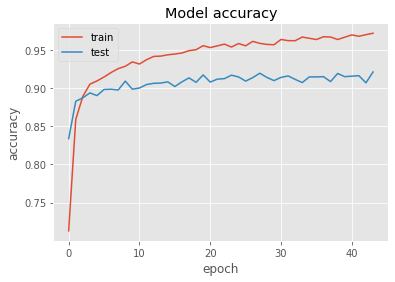

In [23]:
# Create function to plot training graph:
def plot_graph(history1, history2, title, xlabel, ylabel):
  plt.style.use("ggplot")
  plt.plot(history.history[history1])
  plt.plot(history.history[history2])
  plt.title(title)
  plt.ylabel(xlabel)
  plt.xlabel(ylabel)
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

# Plot accuracy
plot_graph('accuracy', 'val_accuracy', 'Model accuracy', 'accuracy', 'epoch')

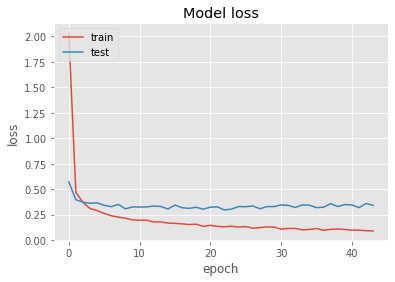

In [24]:
# Plot loss
plot_graph('loss', 'val_loss', 'Model loss', 'loss', 'epoch')

## Try prediction using model

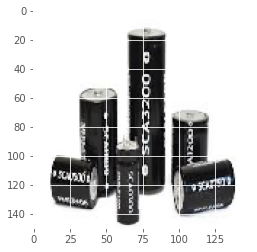

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [79]:
image_path="/content/garbage_classification/val/battery/battery111.jpg"
img = image.load_img(image_path, target_size=(150, 150))
plt.imshow(img)
img = np.expand_dims(img, axis=0)
result=model.predict(img)
plt.show()
print(result)